In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

import seaborn as sns

In [6]:
iris = sns.load_dataset('iris')
display(iris.head())

corr = iris.corr()
print(corr)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


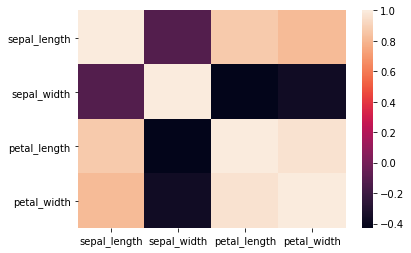

In [7]:
sns.heatmap(corr)
plt.show()

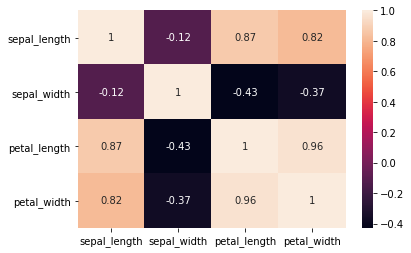

In [8]:
sns.heatmap(corr, annot=True)
plt.show()

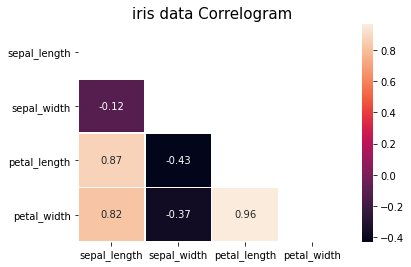

In [9]:
mask= np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr,
            annot = True,
            mask = mask,
            linewidths = .5)
plt.title('iris data Correlogram', fontsize = 15)
plt.show()

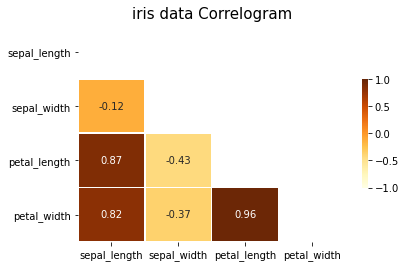

In [10]:
sns.heatmap(corr,
            annot = True,
            mask = mask,
            linewidths = .5,
           cmap = 'YlOrBr',
           vmin = -1, vmax = 1,
           cbar_kws={'shrink' : .5})
plt.title('iris data Correlogram', fontsize = 15)
plt.show()

In [11]:
glass = pd.read_csv('./data/archive/glass.csv')
print(glass.info())
display(glass.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [12]:
glass2 = glass.iloc[:, 1:9]
display(glass2.head())

,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 데이터 표준화
X = StandardScaler().fit_transform(glass2)

# 주성분 계산
pca = PCA(n_components=4)
PCs = pca.fit_transform(X)

# 주성분으로 이루어진 데이터프레임구성
pcdf = pd.DataFrame(data = PCs, columns = ['PC1', 'PC2', 'PC3', 'PC4'])

# 주성분의 분산비율
print(pca.explained_variance_ratio_)

display(pcdf.head())
display(pcdf.shape)

[0.27325098 0.19765453 0.1707622  0.135741  ]


,PC1,PC2,PC3,PC4
0,-1.009643,0.174113,-0.756145,-1.498655
1,-0.176774,0.811926,-1.020481,-0.290930
2,-0.135952,0.841698,-0.918252,0.226453
3,-0.621059,0.721547,-0.454354,-0.095418
4,-0.598625,0.723403,-0.793503,0.371236


(214, 4)

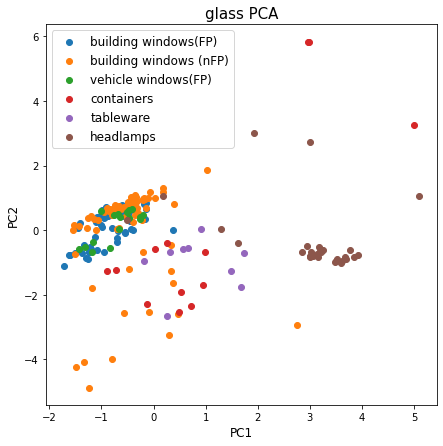

In [14]:
pcdf['Type'] = glass['Type']
grouped = pcdf.groupby('Type')

typename = ['building windows(FP)', 'building windows (nFP)', 'vehicle windows(FP)',
            'vechicle windows(nFP)', 'containers', 'tableware', 'headlamps']

plt.figure(figsize = (7,7))
for name, group in grouped :
    plt.scatter(group.PC1, group.PC2, label = typename[name -1])
    
plt.legend(fontsize = 12, loc='upper left')
plt.title('glass PCA', fontsize = 15)
plt.xlabel('PC1', fontsize = 12)
plt.ylabel('PC2', fontsize = 12)
plt.show()